In [1]:
class MetaCount(type):
    def __new__(cls, name, bases, attrs):
        new_cls = super(MetaCount, cls).__new__(cls, name, bases, attrs)
        new_cls.count = 0
        return new_cls


class Person(metaclass=MetaCount):

    def __init__(self, name, lastname, age, address):
        self.__name = name
        self.age = age
        self.address = address
        self.__lastname = lastname
        type(self).count += 1
        # self.count += 2 creates an *instance* variable

    @property
    def name(self):
        return self.__name

    @name.setter
    def name(self, newvalue):
        self.__name = newvalue

    @property
    def lastname(self):
        return self.__lastname

    @lastname.setter
    def lastname(self, newvalue):
        self.__lastname = newvalue

    def get_fullname(self):
        return f"{self.__lastname} {self.__name}"


class Employee(Person, metaclass=MetaCount):

    def __init__(self, employee_code, salary_per_hour, start_data, departament):
        Person.__base__.__init__(self)
        self.employee_code = employee_code
        self.salary_per_hour = salary_per_hour
        self.start_data = start_data
        self.departament = departament
        type(self).count += 1


p = Person(age=25, address="calle 123 Av Evergreen", name="Richard", lastname="Robles")
p1 = Person(age=25, address="calle 123 Av Evergreen", name="Richard", lastname="Robles")
p2 = Person(age=25, address="calle 123 Av Evergreen", name="Richard", lastname="Robles")

e = Employee(123, 8000000, '2020-12-12', 'accountability')
e.name = "ALfonso"
e.lastname = "De la hoz"

# print(e.name)
print(f"Instances of person class = {p.count}")
print(f"Instances of employee class = {e.count}")
print(p.get_fullname())
p.get_fullname()

Instances of person class = 3
Instances of employee class = 1
Robles Richard


'Robles Richard'

In [2]:
with open("employees.txt", encoding='utf-8') as f:
    print(f.read())

employee_code,name,lastname,address,age,start_date,salary,position,department
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richard,Robles,calle 59A #10a 52,28,2020-12-03,12000000,Python Developer,Development
12345,Richar

In [3]:
import time


def check_types(int, float, str):
    def wrapper(function):

        def wrapper_inner(*args, **kwargs):
            if type(args[0]) == int and type(args[1]) == float and type(args[2]) == str:
                function(*args)
            else:
                print("No se puede ejecutar la funcion")

        return wrapper_inner

    return wrapper


@check_types(int, float, str)
def f(a, b, c):
    print(a, b, c)


f(1, 2.232, "3")


def decorator(func):
    def wrapper_inner(*args, **kw):
        start = time.perf_counter()
        resutl = func(*args, **kw)
        end = time.perf_counter()
        runtime = end - start
        return runtime

    return wrapper_inner


@decorator
def print_range():
    for i in range(10):
        print(i)


print_range()


1 2.232 3
0
1
2
3
4
5
6
7
8
9


0.00023490000000014888

*Exercise 4 <br/>
Suppose that you have 5 Python projects which you’re working on and each of them have
their own dependencies (libraries). These projects have common dependencies but different
versions of the same dependencies. <br/>
Functionality:
- How could you handle this case? How would you solve it?

    managing dependencies using pipenv

- If you imported objects from some module, will the requested objects be loaded only?
or will all the objects and definitions be loaded?. Explain. <br/>

all if you dont define the specific item from the module that you are importing using from module import whatever

- If you imported objects from a module, would the lines code outside of functions and
classes be executed? <br/>
no it would not be executed

- What is the purpose of “if __name__ == __main__” in the bottom part of any module?
When will it be executed?<br/>
For executing modules as scripts you can make the file usable as a script as well as an importable module, because the code that parses the command line only runs if the module is executed as the “main” file


In [4]:
# Exercise 7
import threading
import time
import random

total = 0


def update_total(amount, lock):
    lock.acquire()
    global total
    total0 = total
    total = total0 + amount
    lock.release()


threads = []
transactions = [2, 100, 20, 300, 400, 250, 15, 89]
lock = threading.Lock()

for amount in transactions:
    mythread = threading.Thread(target=update_total, args=[amount, lock])
    mythread.start()
    threads.append(mythread)

for t in threads:
    t.join()

print(sum(transactions), total)



1176 1176


In [5]:
# Exercise 5
from collections.abc import MutableSequence
from collections import UserList


class MyList(UserList):
    """A container for manipulating lists of hosts"""

    def __init__(self, data=None):
        """Initialize the class"""
        super(MyList, self).__init__()
        if (data is not None):
            self._list = list(data)
        else:
            self._list = list()

    def __repr__(self):
        return "<{0} {1}>".format(self.__class__.__name__, self._list)

    def __len__(self):
        """List length"""
        return len(self._list)

    def __getitem__(self, ii):
        """Get a list item"""
        return self._list[ii]

    def __delitem__(self, ii):
        """Delete an item"""
        del self._list[ii]

    def __setitem__(self, ii, val):
        # optional: self._acl_check(val)
        self._list[ii] = val

    def __str__(self):
        return str(self._list)

    def insert(self, ii, val):
        # optional: self._acl_check(val)
        self._list.insert(ii, val)

    def append(self, val):
        self.insert(len(self._list), val)


foo = MyList([1, 2, 3, 4, 5])
foo.append(6)
print(foo)

[1, 2, 3, 4, 5, 6]


In [6]:
# A simple Python program to introduce a linked list 

# Node class 
class Node:

    # Function to initialise the node object
    def __init__(self, data):
        self.data = data  # Assign data
        self.next = None  # Initialize next as null


# Linked List class contains a Node object 
class LinkedList:

    # Function to initialize head
    def __init__(self):
        self.head = None


# Start with the empty list 
llist = LinkedList()

llist.head = Node(1)
second = Node(2)
third = Node(3)
llist.head.next = second;  # Link first node with second
second.next = third;  # Link second node with the third node
third.next = None

print(llist.head.data)


1


In [7]:
class Countdown(object):
    def __init__(self, start):
        self.start = start

    def __iter__(self):
        n = self.start
        while n > 0:
            yield n
            n -= 1


c = Countdown(5)

for x in c:
    print(x)





5
4
3
2
1



The magic method __iter__ implement the ways to iterate over a sequence of holding multiples data


<code>
import csv

def reader(filename):
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            yield line

def parse_transaction(lines):
    rows = csv.reader(lines)
    types = [int, str, str, str, str, str, str, str, str]
    converted = ([func(val) for func, val in zip(types, rows)] for row in rows)
    return converted


def filter(rows, func):
    filtered = (row for row in rows if func(row))


lines = reader('./employees.csv')

transaction = parse_transaction(lines)

filtered_transaction = filter(transaction, lambda x: x[0] > 1)

for t in filtered_transaction:
    print(t)
</code>

In [8]:
import types
import collections


class Overloaded(object):
    instances = 12

    def changed_method(self, number):
        self.instance_variable = self.instance_variable + 1
        self._nvalue = 0

    @property
    def nvalue(self):
        return self._nvalue

    @nvalue.setter
    def nvalue(self, value: int):
        if not isinstance(value, int):
            raise TypeError("The value must be an integer")

        if value < 0:
            raise ValueError("The value must be greater than 0")

        self._nvalue = value


def new_changed_method(self, number):
    pass


print(Overloaded.__dict__)
Overloaded.changed_method = new_changed_method
over_object = Overloaded()
over_object.changed_method(20)
over_object.nvalue = 200

print(over_object.__dict__)
print(over_object.nvalue)
Town = collections.namedtuple('Town', ['name', 'population', 'coordinates', 'capital', 'state_bird'])
funkytown = Town('funky', 300, 'somewhere', 'lipps', 'chicken')

funkytown._asdict()


class Geeks:
    def __init__(self):
        self._age = 0

    # function to get value of _age
    def get_age(self):
        print("getter method called")
        return self._age

    # function to set value of _age
    def set_age(self, a):
        print("setter method called")
        self._age = a

    # function to delete _age attribute
    def del_age(self):
        del self._age

    # age = property(get_age, set_age, del_age)


mark = Geeks()

mark.age = 10

print(f"Edad = {mark.age}")
print(mark.__dict__, Geeks.__dict__)
print(hasattr(mark, '__getitem__'))
print(hasattr(mark, '__dict__'))
print("hasattr method")

{'__module__': '__main__', 'instances': 12, 'changed_method': <function Overloaded.changed_method at 0x000001C2183FFA60>, 'nvalue': <property object at 0x000001C2183FD720>, '__dict__': <attribute '__dict__' of 'Overloaded' objects>, '__weakref__': <attribute '__weakref__' of 'Overloaded' objects>, '__doc__': None}
{'_nvalue': 200}
200
Edad = 10
{'_age': 0, 'age': 10} {'__module__': '__main__', '__init__': <function Geeks.__init__ at 0x000001C2183FB0D0>, 'get_age': <function Geeks.get_age at 0x000001C2183FB040>, 'set_age': <function Geeks.set_age at 0x000001C2183FB820>, 'del_age': <function Geeks.del_age at 0x000001C2183FB8B0>, '__dict__': <attribute '__dict__' of 'Geeks' objects>, '__weakref__': <attribute '__weakref__' of 'Geeks' objects>, '__doc__': None}
False
True
hasattr method


In [9]:
def factorial(numero):
    producto = 1
    for i in range(1, numero + 1):
        producto = producto * i
        producto = producto * i

    return producto


producto = factorial(5)

print(producto)

14400


In [10]:
print("hello world")
print("hola mundo")
print()
a = 999
b = a ** 12
print(a.__add__(100))
print(a.__add__(10000))

hello world
hola mundo

1099
10999


In [11]:
class Wrapper(object):
    def __init__(self, wrappee):
        self.wrappee = wrappee

    def foo(self):
        print('foo')

    def __getattr__(self, attr):
        return getattr(self.wrappee, attr)


class Wrappee(object):
    def bar(self):
        print('bar')


o2 = Wrappee()
o1 = Wrapper(o2)

print(o1.foo())

print(o1.bar())

foo
None
bar
None


In [12]:
import time


def after(seconds, func):
    time.sleep(seconds)
    func()


def greeting(name):
    print("Hello Python Developer")


after(5, lambda: greeting("Richard Robles"))


def linear(b):
    def do_linear(x, m):
        return x * m + b

    return do_linear


calculate_cab_cost = linear(20)
print(calculate_cab_cost)
cost = calculate_cab_cost(10, 1.5)
print(cost)


def make_multiplier_of(n):
    def multiplier(x):
        return x * n

    return multiplier


# Multiplier of 3
times3 = make_multiplier_of(3)

# Multiplier of 5
times5 = make_multiplier_of(5)

# Output: 27
print(times3(9))

# Output: 15
print(times5(3))

# Output: 30
print(times5(times3(2)))


def locales_setup():
    translations = {
        ('es', 'I am python programmer'): "Yo soy un programador python",
        ('en', 'Yo soy un programador python'): "I am python programmer"
    }

    def translate(text, current_lang="es"):
        try:
            return translations[(current_lang, text)]
        except KeyError:
            return text

    return translate


def typed_property(name, expected_type):
    private_name = "_" + name

    @property
    def prop(self):
        return getattr(self, private_name)

    @prop.getter
    def prop(self, value):
        if not isinstance(value, expected_type):
            raise TypeError(f"Expected {expected_type}")
        setattr(self, private_name, value)

    return prop



class Empleado(object):
        name = typed_property("name", str)
        age = typed_property("age", int)
        salary = typed_property("salary", float)

        def __init__(self, name, age, salary):
            self.name = name
            self.age = age
            self.salary = salary

        def __repr__(self):
            return f"Empleado {self.name}, {self.age}, {self.salary}"


Integer = lambda name: typed_property(name, int)
Float = lambda name: typed_property(name, float)



Hello Python Developer
<function linear.<locals>.do_linear at 0x000001C218413280>
35.0
27
15
30


In [13]:
from threading import Thread


def fib(number):
    def _fib(n):
        if n == 0:
            return 0
        elif n == 1 or n == 2:
            return 1
        else:
            return _fib(n - 1) + _fib(n - 2)

    result = _fib(number)
    print(f"Threading number {Thread} and result {result}")
    return result


numbers = [1, 2, 3, 4, 5, 6, 7, 8]
threads = []

for number in numbers:
    myThread = Thread(target=fib, args=[number])
    myThread.start()
    threads.append(myThread)

for t in threads:
    t.join()

Threading number <class 'threading.Thread'> and result 1
Threading number <class 'threading.Thread'> and result 1
Threading number <class 'threading.Thread'> and result 2Threading number <class 'threading.Thread'> and result 3

Threading number <class 'threading.Thread'> and result 5
Threading number <class 'threading.Thread'> and result 8
Threading number <class 'threading.Thread'> and result 13
Threading number <class 'threading.Thread'> and result 21


In [14]:
from multiprocessing import Process
import os

def fib(number):
    def _fib(n):
        if n == 0:
            return 0
        elif n == 1 or n == 2:
            return 1
        else:
            return _fib(n - 1) + _fib(n - 2)

    result = _fib(number)
    print(f"Threading number {os.getpid()} and result {result}")
    return result


numbers = [1, 2, 3, 4, 5, 6, 7, 8]
proceses = []

for number in numbers:
    myProcess = Process(target=fib, args=[number])
    myProcess.start()
    proceses.append(myProcess)

for p in proceses:
    p.join()

In [15]:
from functools import reduce

listWithoutReduce = [1, 2, 3, 4, 5, 6, 7, 8]

listReduced = reduce(lambda acc, x: acc + x if x % 2 == 0 else acc + 0, listWithoutReduce, 0)
print(listReduced)

20


In [16]:
import numpy as np

np.abs(-999)

lista = [1, 2, 3, 4, 5, 6, 7, 800, 4375, 326432]

np_array = np.array(lista)

print(np_array)

print(type(np_array))

print(np.sum(np_array))
print(np.prod(np_array))
print(np.min(np_array))
print(np.max(np_array))
print(3 * np_array)
print(1 / np_array)
lista = [0.5, 0.2, 0.1, 0.4]
np_array = np.array(lista)

np.exp(-1)
1 / (1 + np.exp(-np_array))
a = [2, 3, 4, 5, 6]
b = [10, 20, 30, 40, 50]
a_np = np.array(a)
b_np = np.array(b)
suma = a_np + b_np
print(dir(np))

print(a_np + b_np)
print(np.concatenate([a_np, b_np]))
a = np.arange(0, 1, 0.1)
b = np.linspace(0, 1.1, 20)
c = np.random.normal(0, 1, 10)


print(np)
array = np.array(range(20))
matrix = array.reshape((4,5))
print(matrix.ndim)
print(matrix.size)
print(matrix.shape)
print(matrix)
print(matrix[2,3])
print(matrix > 10)
print(matrix % 2)
print(np_array[np_array % 2 == 0])
np_array = np.array(range(100)).reshape(10,10)
print("np array is",np_array[2:8,:])
print("np array is",np_array[2:5,2:4])
print("np array is",np_array[::2])
np_array = np.array(range(100)).reshape(10,10)
print(np_array[2:8,:])
print(np_array[2:5,2:4])
print(np_array[::2])
A = np.array([1,2,3,4,5])

B = np.array([2,1,3,4,5])

print((a == b))



[     1      2      3      4      5      6      7    800   4375 326432]
<class 'numpy.ndarray'>
331635
2121220096
1
326432
[     3      6      9     12     15     18     21   2400  13125 979296]
[1.00000000e+00 5.00000000e-01 3.33333333e-01 2.50000000e-01
 2.00000000e-01 1.66666667e-01 1.42857143e-01 1.25000000e-03
 2.28571429e-04 3.06342515e-06]
['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'MachAr', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarnin

<ipython-input-16-ac5e8fd44371>:61: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((a == b))


In [17]:
import pandas as pd

pokemon = ["Bulbazor","Squirtle","Charizard","Pikachu","Onix","Geodude","Vulpix","Starmie"]
types = ["regardless Poison","Water","Fire","Electric","Rock Ground","row_stack ground","Fire","Water"]
master = ["Ash","Ash","Ash","Ash","Brock","Brock","Misty","Misty"]
pokedex_number = [1,4, 7, 25, 95, 74, 37, 121]

""" data_frame = pd.DataFrame({pokemon: pokemon, master:master, types: types, pokedex_number: pokedex_number}) """
data_frame = pd.DataFrame({"pokemon":pokemon, "master":master, "types":types, "pokedex_number":pokedex_number})

print(type(data_frame.values))

print(data_frame['pokemon'])
print(type(data_frame['pokemon']))
print(data_frame['pokedex_number'].max())
print(data_frame.columns)
data_frame.loc[3, 'types']

envolved = ["Yes","No","Yes","No","Yes","No","Yes","No"]

data_frame['envolved'] = envolved


data_frame

# una serie con un valor constante o broadcasting
data_frame['region'] = "Kanto"

data_frame

<class 'numpy.ndarray'>
0     Bulbazor
1     Squirtle
2    Charizard
3      Pikachu
4         Onix
5      Geodude
6       Vulpix
7      Starmie
Name: pokemon, dtype: object
<class 'pandas.core.series.Series'>
121
Index(['pokemon', 'master', 'types', 'pokedex_number'], dtype='object')


,pokemon,master,types,pokedex_number,envolved,region
0,Bulbazor,Ash,regardless Poison,1,Yes,Kanto
1,Squirtle,Ash,Water,4,No,Kanto
2,Charizard,Ash,Fire,7,Yes,Kanto
3,Pikachu,Ash,Electric,25,No,Kanto
4,Onix,Brock,Rock Ground,95,Yes,Kanto
5,Geodude,Brock,row_stack ground,74,No,Kanto
6,Vulpix,Misty,Fire,37,Yes,Kanto
7,Starmie,Misty,Water,121,No,Kanto


In [18]:
data_frame[['pokemon', 'types']]

,pokemon,types
0,Bulbazor,regardless Poison
1,Squirtle,Water
2,Charizard,Fire
3,Pikachu,Electric
4,Onix,Rock Ground
5,Geodude,row_stack ground
6,Vulpix,Fire
7,Starmie,Water


In [19]:
print(data_frame.get(['pokemon','types']))


     pokemon              types
0   Bulbazor  regardless Poison
1   Squirtle              Water
2  Charizard               Fire
3    Pikachu           Electric
4       Onix        Rock Ground
5    Geodude   row_stack ground
6     Vulpix               Fire
7    Starmie              Water


In [20]:
data_frame.drop('region', axis = 1)

,pokemon,master,types,pokedex_number,envolved
0,Bulbazor,Ash,regardless Poison,1,Yes
1,Squirtle,Ash,Water,4,No
2,Charizard,Ash,Fire,7,Yes
3,Pikachu,Ash,Electric,25,No
4,Onix,Brock,Rock Ground,95,Yes
5,Geodude,Brock,row_stack ground,74,No
6,Vulpix,Misty,Fire,37,Yes
7,Starmie,Misty,Water,121,No


ORDERNAR COLUMNAS USANDO O CON DOBLE CORCHETE

In [21]:
data_frame[['envolved', "pokemon"]]

,envolved,pokemon
0,Yes,Bulbazor
1,No,Squirtle
2,Yes,Charizard
3,No,Pikachu
4,Yes,Onix
5,No,Geodude
6,Yes,Vulpix
7,No,Starmie


In [22]:
data_frame.loc[5]

pokemon                    Geodude
master                       Brock
types             row_stack ground
pokedex_number                  74
envolved                        No
region                       Kanto
Name: 5, dtype: object

In [23]:
data_frame.drop(1)

,pokemon,master,types,pokedex_number,envolved,region
0,Bulbazor,Ash,regardless Poison,1,Yes,Kanto
2,Charizard,Ash,Fire,7,Yes,Kanto
3,Pikachu,Ash,Electric,25,No,Kanto
4,Onix,Brock,Rock Ground,95,Yes,Kanto
5,Geodude,Brock,row_stack ground,74,No,Kanto
6,Vulpix,Misty,Fire,37,Yes,Kanto
7,Starmie,Misty,Water,121,No,Kanto


Para leer desde archivos 
es con: 

In [24]:
import pandas

df = pandas.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv")

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [25]:
import requests
import pandas

url = "https://pokemondb.net/pokedex/all"

html_text = requests.get(url).content

dfpkd = pandas.read_html(html_text)

contenido = dfpkd[0]

contenido.to_csv('./contenido.csv')

In [26]:
contenido.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


In [27]:
contenido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        1045 non-null   int64 
 1   Name     1045 non-null   object
 2   Type     1045 non-null   object
 3   Total    1045 non-null   int64 
 4   HP       1045 non-null   int64 
 5   Attack   1045 non-null   int64 
 6   Defense  1045 non-null   int64 
 7   Sp. Atk  1045 non-null   int64 
 8   Sp. Def  1045 non-null   int64 
 9   Speed    1045 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 81.8+ KB


In [28]:
contenido.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


In [29]:
contenido['Attack'] + contenido['Sp. Atk']

0       114
1       142
2       182
3       222
4       112
       ... 
1040    210
1041    210
1042    160
1043    250
1044    250
Length: 1045, dtype: int64

In [30]:
sum = contenido.get(['Attack','Sp. Atk']).sum(axis = 1)

print(sum)


0       114
1       142
2       182
3       222
4       112
       ... 
1040    210
1041    210
1042    160
1043    250
1044    250
Length: 1045, dtype: int64


In [31]:
contenido.tail()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1040,896,Glastrier,Ice,580,100,145,130,65,110,30
1041,897,Spectrier,Ghost,580,100,65,60,145,80,130
1042,898,Calyrex,Psychic Grass,500,100,80,80,80,80,80
1043,898,Calyrex Ice Rider,Psychic Ice,680,100,165,150,85,130,50
1044,898,Calyrex Shadow Rider,Psychic Ghost,680,100,85,80,165,100,150


In [41]:
def generaciones(numero):
    if numero == 1:
        return 'Kanto'
    elif numero == 2:
        return 'Johto'
    elif numero == 3:
        return 'Hoenn'
    elif numero == 4:
        return 'Sinnoh'
    elif numero == 5:
        return 'Unova'
    elif numero == 6:
        return 'kalos'
    elif numero == 7:
        return 'Alola'

contenido
# contenido['region'] = contenido['generation'].apply(generaciones)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
548,460,Abomasnow,Grass Ice,494,90,92,75,92,85,60
549,460,Abomasnow Mega Abomasnow,Grass Ice,594,90,132,105,132,105,30
81,63,Abra,Psychic,310,25,20,15,105,55,90
430,359,Absol,Dark,465,65,130,60,75,60,75
431,359,Absol Mega Absol,Dark,565,65,150,60,115,60,115
...,...,...,...,...,...,...,...,...,...,...
54,41,Zubat,Poison Flying,245,40,45,35,30,40,55
739,634,Zweilous,Dark Dragon,420,72,85,70,65,70,58
840,718,Zygarde 10% Forme,Dragon Ground,486,54,100,71,61,85,115
839,718,Zygarde 50% Forme,Dragon Ground,600,108,100,121,81,95,95


In [33]:
contenido['Attack'].unique()

array([ 49,  62,  82, 100,  52,  64,  84, 130, 104,  48,  63,  83, 103,
        30,  20,  45,  35,  25,  90, 150,  60,  80,  56,  81,  71,  95,
        55,  85,  75,  47,  92,  57,  72, 102,  70,  41,  76,  67,  50,
        65, 105, 110,  40, 120,  73,   5, 125, 155,  10, 115, 135, 134,
       190,  46,  38,  58,  33, 185, 164, 160,  51,  91, 140,  43,  78,
        15, 165,  68,  23, 145, 180,  89, 109,  66,  86,  42,  29,  59,
        79,  69,  94, 136,  93,  24, 170, 112,  61, 106, 132, 123,  88,
        53,  98,  77,  27, 117, 108,  44,  87, 147,  74, 124,  97, 129,
       128, 107,  36,  22,  54, 121, 131, 137, 113, 139, 101, 181, 157,
       167, 127, 143, 116,  28, 118], dtype=int64)

In [34]:
contenido[contenido['Attack'] == 49]

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
197,152,Chikorita,Grass,318,45,49,65,49,65,45
544,456,Finneon,Water,330,49,49,56,49,61,66


In [35]:
import numpy

contenido.loc[numpy.logical_and(contenido['Attack'] == 45, contenido['Defense'] == 45)]

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
240,194,Wooper,Water Ground,210,55,45,45,25,25,15
359,300,Skitty,Normal,260,50,45,45,35,35,50
991,854,Sinistea,Ghost,308,40,45,45,74,54,50


In [36]:
contenido = contenido.sort_values(by = 'Name')
contenido

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
548,460,Abomasnow,Grass Ice,494,90,92,75,92,85,60
549,460,Abomasnow Mega Abomasnow,Grass Ice,594,90,132,105,132,105,30
81,63,Abra,Psychic,310,25,20,15,105,55,90
430,359,Absol,Dark,465,65,130,60,75,60,75
431,359,Absol Mega Absol,Dark,565,65,150,60,115,60,115
...,...,...,...,...,...,...,...,...,...,...
54,41,Zubat,Poison Flying,245,40,45,35,30,40,55
739,634,Zweilous,Dark Dragon,420,72,85,70,65,70,58
840,718,Zygarde 10% Forme,Dragon Ground,486,54,100,71,61,85,115
839,718,Zygarde 50% Forme,Dragon Ground,600,108,100,121,81,95,95


In [37]:
contenido.sort_values(by='Name', ascending=False)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
841,718,Zygarde Complete Forme,Dragon Ground,708,216,100,121,91,95,85
839,718,Zygarde 50% Forme,Dragon Ground,600,108,100,121,81,95,95
840,718,Zygarde 10% Forme,Dragon Ground,486,54,100,71,61,85,115
739,634,Zweilous,Dark Dragon,420,72,85,70,65,70,58
54,41,Zubat,Poison Flying,245,40,45,35,30,40,55
...,...,...,...,...,...,...,...,...,...,...
431,359,Absol Mega Absol,Dark,565,65,150,60,115,60,115
430,359,Absol,Dark,465,65,130,60,75,60,75
81,63,Abra,Psychic,310,25,20,15,105,55,90
549,460,Abomasnow Mega Abomasnow,Grass Ice,594,90,132,105,132,105,30


In [38]:
contenido.groupby('Attack').mean()

,#,Total,HP,Defense,Sp. Atk,Sp. Def,Speed
Attack,,,,,,,
5,276.500000,335.000000,175.000000,5.000000,25.000000,85.000000,40.000000
10,194.666667,415.000000,98.333333,98.333333,33.333333,128.333333,46.666667
15,349.000000,200.000000,20.000000,20.000000,10.000000,55.000000,80.000000
20,315.800000,241.500000,44.000000,38.000000,38.000000,55.000000,46.500000
22,665.000000,213.000000,45.000000,60.000000,27.000000,30.000000,29.000000
...,...,...,...,...,...,...,...
170,659.666667,706.666667,108.333333,110.000000,106.666667,100.000000,111.666667
180,384.333333,716.666667,85.000000,93.333333,170.000000,70.000000,118.333333
181,798.000000,570.000000,59.000000,131.000000,59.000000,31.000000,109.000000


In [39]:
groupedByAttack = contenido.groupby('Attack').count()
groupedByAttack.head(10)

,#,Name,Type,Total,HP,Defense,Sp. Atk,Sp. Def,Speed
Attack,,,,,,,,,
5,2,2,2,2,2,2,2,2,2
10,3,3,3,3,3,3,3,3,3
15,1,1,1,1,1,1,1,1,1
20,10,10,10,10,10,10,10,10,10
22,1,1,1,1,1,1,1,1,1
23,1,1,1,1,1,1,1,1,1
24,1,1,1,1,1,1,1,1,1
25,8,8,8,8,8,8,8,8,8
27,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

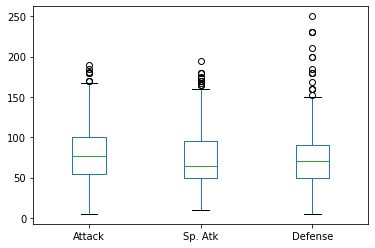

In [44]:
import numpy
contenido.get(['Attack', 'Sp. Atk','Defense']).plot(kind="box")

# contenido.loc[numpy.logical_or(contenido['types'] == 'Dark', contenido['types'] == 'Grass Ice')]

<h3>the end</h3>